## **Business Understanding** ##

<span style="color:yellow">Context:</span>
As a significant player in the digital hospitality industry, Airbnb faces unique challenges in managing and optimizing its listings. With a business model focused on accommodations provided by individuals and companies, Airbnb relies on data from listings to determine its business strategies and policies. This dataset, encompassing various aspects of listings in Bangkok, allows us to delve deeper into the market dynamics, consumer preferences, and factors influencing the success of a listing.

<span style="color:yellow">Problem Statement:</span>
Amid intense market competition and the need to maintain service quality, Airbnb confronts challenges in maximizing revenue and ensuring customer satisfaction. A primary issue is how to set optimal pricing, enhance the popularity of listings, and understand the impact of location and other factors on listing performance. With this dataset, we can analyze the factors affecting listing performance and identify ways to improve hosts' success on the Airbnb platform.

<span style="color:yellow">Goals:</span>
The main goal of this analysis is to provide insights that can help Airbnb and its hosts make more informed decisions regarding pricing, promotion, and listing management. Specifically, we aim to:
1. Identify the factors influencing the price and popularity of listings.
2. Determine the impact of location and other characteristics on listing performance.
3. Develop recommendations based on the analysis to improve revenue and customer satisfaction.

Stakeholders: The primary stakeholders of this analysis are the managers and executives at Airbnb responsible for operational strategy and the hosts who use the Airbnb platform to rent out their properties.

<span style="color:yellow">Analytic Approach:</span>
The first step in this analysis is to examine the dataset to identify the critical characteristics of listings that play a significant role in determining price, popularity, and overall success on Airbnb. We will analyze the data descriptively to gain a basic understanding, followed by inferential statistical analysis to identify patterns and relationships. Based on this analysis, we will develop recommendations to help Airbnb and its hosts make more informed decisions regarding managing and promoting their listings.

<span style="color:yellow">Metric Evaluation</span>

To evaluate the success of this analysis, we will use metrics such as:

1. Accuracy in identifying the factors that influence price and popularity.
2. Relevance and applicability of recommendations in the Airbnb business context.
3. The potential impact of the recommendations on increasing revenue and customer satisfaction.

### Library ###

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
import re
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from collections import Counter
from tabulate import tabulate
warnings.filterwarnings("ignore")

### Load Initial Dataset ###

In [2]:
# Read the CSV file
with open('Airbnb Listing Bangkok Cleaned.csv', 'r') as file:
    df = pd.read_csv(file)

## **Descriptive Statistical Analysis** ##

In [3]:
# Descriptive statistics for the numerical columns
descriptive_stats = df.describe()

# Calculate Median Absolute Deviation (MAD)
mad_values = df.mad()

# Check for missing values
missing_values = df.isnull().sum()

# Combine descriptive statistics and MAD values into one DataFrame
combined_stats = descriptive_stats.append(mad_values.to_frame().T.rename({0: 'MAD'}))

# Combine missing values into the DataFrame
combined_stats = combined_stats.append(missing_values.to_frame().T.rename({0: 'Missing Values'}))

# Display using tabulate
print(tabulate(combined_stats, headers='keys', tablefmt='pretty', floatfmt=".2f"))

+----------------+------------------------+--------------------+----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+--------------------------------+--------------------+-----------------------+--------------+-----------+---------------+-----------+-------------+-----------+------------+
|                |       listing_id       |      host_id       |       latitude       |      longitude       |       price        |   minimum_nights   | number_of_reviews  | reviews_per_month  | calculated_host_listings_count |  availability_365  | number_of_reviews_ltm | listing_name | host_name | neighbourhood | room_type | last_review | stay_type | popularity |
+----------------+------------------------+--------------------+----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+--------------------------------+--------------------+------------------

Summary of Descriptive Statistics and MAD from the Dataset:

1. Price: Significant price variation with an average of 3,218 THB. A high MAD indicates a wide range in listing prices, signifying a diversity of options from economical to luxurious.
2. Stay Duration: The standard minimum of one night shows flexibility for short-term travelers. A low MAD here indicates consistency in minimum stay policies.
3. Reviews: A high average and maximum number of reviews suggest active user engagement. A significant MAD in studies portrays a wide variation in the number of reviews per listing.
4. Host Activity: An average of about 14 listings per host, with a high MAD, indicates significant variation in the number of listings operated by different hosts.
5. Availability: An average availability of 244 days a year with a notable MAD indicates variability in availability among different listings.


The absence of missing values indicates high data quality, allowing for more accurate and reliable analysis. This data reveals a dynamic Airbnb market with a diverse range of accommodations. Variability in pricing, the number of reviews, host activity, and listing availability point to opportunities for varied pricing strategies and service adjustments. These insights can aid in optimizing pricing and promotional decisions to enhance revenue and customer satisfaction.

## **Inferential Statistical Analysis** ##


### **1. Corellation between column using heatmap** ###

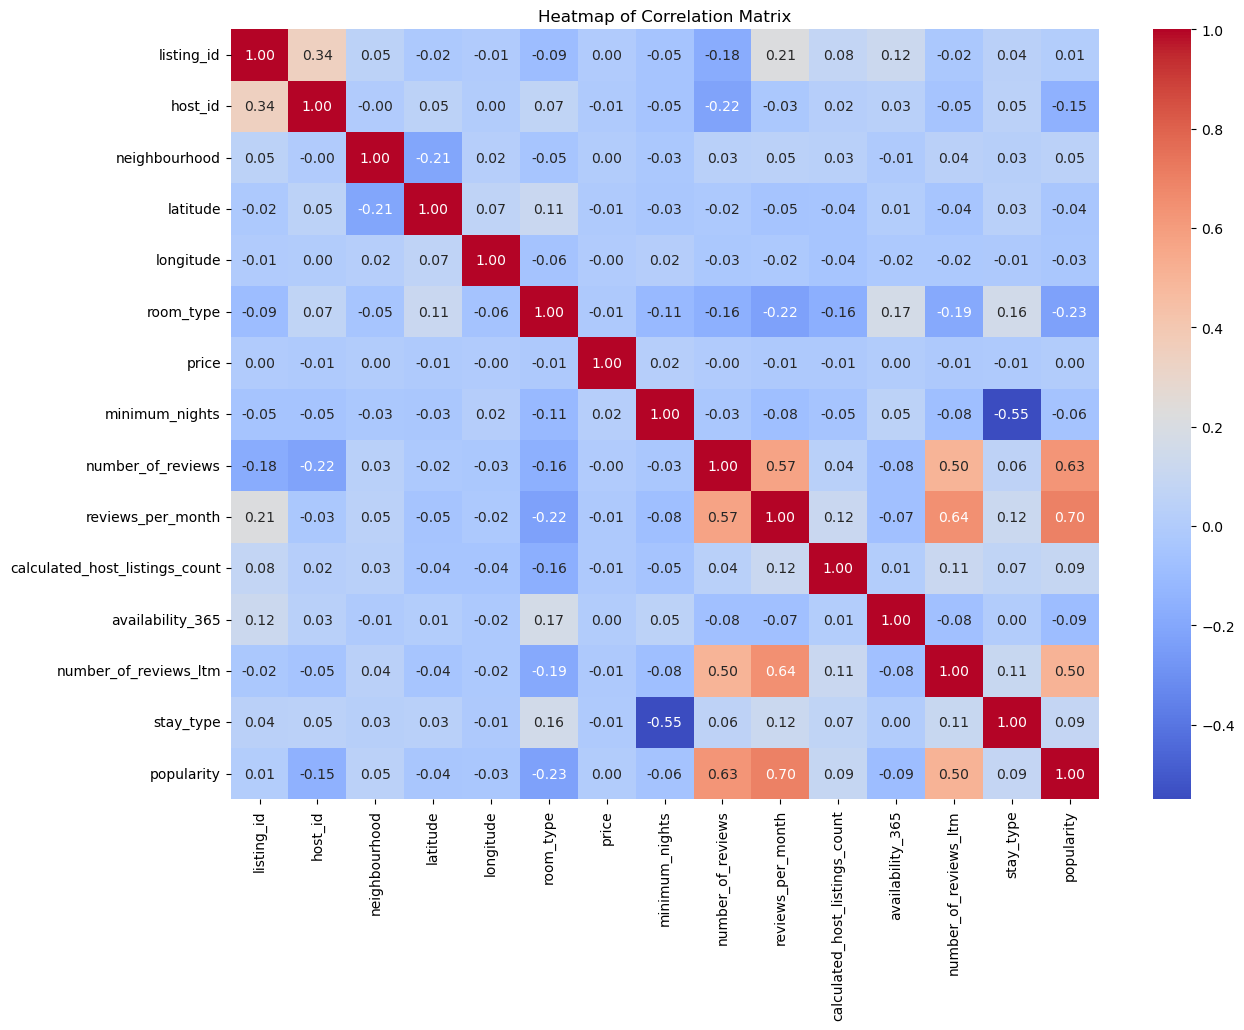

           Variable 1            Variable 2  Correlation
    reviews_per_month            popularity     0.699110
           popularity     reviews_per_month     0.699110
    reviews_per_month number_of_reviews_ltm     0.642945
number_of_reviews_ltm     reviews_per_month     0.642945
    number_of_reviews            popularity     0.629638
           popularity     number_of_reviews     0.629638
    number_of_reviews     reviews_per_month     0.571851
    reviews_per_month     number_of_reviews     0.571851
number_of_reviews_ltm            popularity     0.503468
           popularity number_of_reviews_ltm     0.503468
       minimum_nights             stay_type    -0.550529
            stay_type        minimum_nights    -0.550529


In [4]:
# Columns that will be converted to ordinal
categorical_columns = ['neighbourhood', 'room_type', 'stay_type', 'popularity']

# Make df a copy
x = df.copy()

# Ordinal encoding for categorical columns
ordinal_encoder = OrdinalEncoder()
x[categorical_columns] = ordinal_encoder.fit_transform(x[categorical_columns])

# Calculating the correlation matrix
correlation_matrix = x.corr()

# Creating a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Extracting strong correlations
strong_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
strong_correlations = strong_correlations[strong_correlations != 1].stack().reset_index()
strong_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']
strong_correlations = strong_correlations.sort_values(by='Correlation', ascending=False)

# Displaying strong correlations without index
print(strong_correlations[['Variable 1', 'Variable 2', 'Correlation']].to_string(index=False))

From the correlation analysis, here are some key findings:

1. Strong Positive Correlation between Popularity and Reviews:
    - Popularity and Reviews per Month: There is a robust correlation (0.699) between the popularity of a listing and the number of reviews per month. This correlation means that more popular listings receive more reviews per month.
    - Popularity and Number of Reviews: This strong correlation (0.629) indicates that more popular listings also tend to have a higher total number of reviews.

2. Relationship Between Monthly Reviews and Recent Reviews:
    - Reviews per Month and Number of Reviews LTM (Last Twelve Months): The correlation (0.643) indicates that listings receiving many monthly reviews also tend to have more reviews in the last twelve months.

3. Consistency Between Monthly Reviews and Total Reviews:
    - Reviews per Month and Number of Reviews: The correlation (0.572) shows that listings with high monthly reviews also tend to have a high total number of reviews.

4. Positive Correlation between Popularity and Recent Reviews:
    - Popularity and Number of Reviews LTM: The correlation (0.503) suggests that more recently popular listings also tend to receive more reviews.

5. Negative Correlation between Type of Accommodation and Minimum Nights:
    - Minimum Nights and Stay Type: The reasonably strong negative correlation (-0.551) indicates that specific accommodations (long-term or short-term) may have different policies regarding the minimum number of nights required to book.

### **2. Chi-square and Kruskal-Wallis test** ###

In [5]:
# Selecting relevant columns for analysis
inferential_columns = ['price', 'popularity', 'neighbourhood', 'room_type', 'stay_type']

# Make df a copy
x = df.copy()

# Creating a subset of the DataFrame for inferential analysis
inferential_df = x[inferential_columns]

# Performing inferential statistics
# Chi-square test for categorical variables: neighbourhood, room_type, stay_type
chi2_results = {}
for col in ['neighbourhood', 'room_type', 'stay_type']:
    contingency_table = pd.crosstab(inferential_df[col], inferential_df['popularity'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    chi2_results[col] = {'Chi2': chi2, 'p-value': p}


# Krustak-Wallis test for price vs. neighbourhood, room_type, stay_type
kruskal_results = {}
for col in ['neighbourhood', 'room_type', 'stay_type']:
    groups = inferential_df.groupby(col)['price']
    H, p = stats.kruskal(*[group for name, group in groups])
    kruskal_results[col] = {'H': H, 'p-value': p}

# Organizing results
results = {
    'Chi-square Test': chi2_results,
    'Kruskal-Wallis Test': kruskal_results
}

# Preparing data for tabulate
table_data = []

# Formatting Chi-square results
for col, vals in results['Chi-square Test'].items():
    table_data.append(['Chi-square', col, vals['Chi2'], vals['p-value']])

# Displaying Chi-square results
chi_square_table_data = [['Chi-square', col, vals['Chi2'], vals['p-value']] for col, vals in chi2_results.items()]
print("Chi-square Test Results:")
print(tabulate(chi_square_table_data, headers=['Test Type', 'Variable', 'Statistic', 'p-value'], tablefmt='grid'))

# Formatting Kruskal-Wallis results
for col, vals in results['Kruskal-Wallis Test'].items():
    table_data.append(['Kruskal-Wallis', col, vals['H'], vals['p-value']])

# Displaying Kruskal-Wallis results
kruskal_table_data = [['Kruskal-Wallis', col, vals['H'], vals['p-value']] for col, vals in kruskal_results.items()]
print("\nKruskal-Wallis Test Results:")
print(tabulate(kruskal_table_data, headers=['Test Type', 'Variable', 'Statistic', 'p-value'], tablefmt='grid'))


Chi-square Test Results:
+-------------+---------------+-------------+--------------+
| Test Type   | Variable      |   Statistic |      p-value |
+=============+===============+=============+==============+
| Chi-square  | neighbourhood |     531.342 | 3.40754e-82  |
+-------------+---------------+-------------+--------------+
| Chi-square  | room_type     |     835.111 | 1.05014e-180 |
+-------------+---------------+-------------+--------------+
| Chi-square  | stay_type     |     130.146 | 3.80641e-30  |
+-------------+---------------+-------------+--------------+

Kruskal-Wallis Test Results:
+----------------+---------------+-------------+--------------+
| Test Type      | Variable      |   Statistic |      p-value |
+================+===============+=============+==============+
| Kruskal-Wallis | neighbourhood |     2013.17 | 0            |
+----------------+---------------+-------------+--------------+
| Kruskal-Wallis | room_type     |     1187    | 4.85747e-257 |
+-----------

Analysis Results

1. Chi-square Test (Examining the relationship between popularity and neighbourhood, room_type, and stay_type.)

    - Neighbourhood: There is a highly significant relationship between the neighbourhood and the popularity of a listing.
    - Room Type: There is a highly significant relationship between room type and the popularity of a listing.
    - Stay Type: A significant relationship exists between stay type and the popularity of a listing.

2. Kruskal-Wallis Test (Examining the relationship between price and neighbourhood, room_type, and stay_type.)
    - Neighbourhood: There are significant differences in median prices among different neighbourhoods.
    - Room Type: There are significant differences in median prices among different room types.
    - Stay Type: There are significant differences in median prices between short-term and long-term stays.

Insight: 

These findings suggest that location, room type, and duration of stay significantly impact both the popularity and pricing of listings, providing valuable insights for pricing and marketing strategies for Airbnb listings.

## **Further Analysis and Visualization** ##

### **1. Internal Factors** ###

#### **A. Price vs Popularity** ####

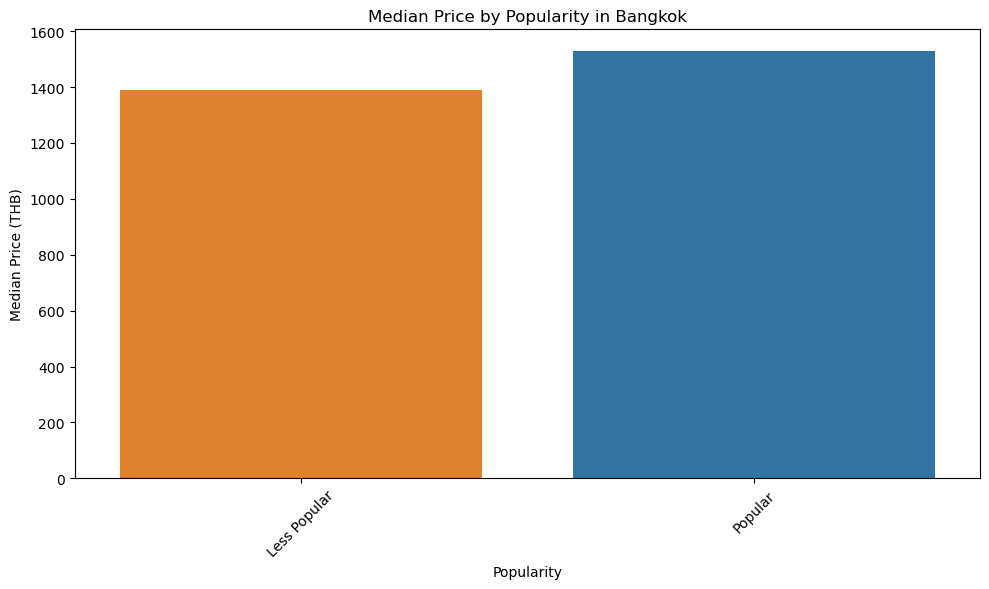

In [6]:
# Calculating the median price for each popularity category
median_price_by_popularity = df.groupby('popularity')['price'].median()

# Define the colors
blue_color = "#1f77b4"  # A shade of blue
orange_color = "#ff7f0e"  # A shade of orange

# Creating a palette with the specified colors for each category
popularity_palette = {"Popular": blue_color, "Less Popular": orange_color}

# Visualizing the data using a barplot with the specified colors
plt.figure(figsize=(10, 6))
sns.barplot(x=median_price_by_popularity.index, y=median_price_by_popularity.values, palette=popularity_palette)
plt.title('Median Price by Popularity in Bangkok')
plt.xlabel('Popularity')
plt.ylabel('Median Price (THB)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight:
There is a difference in the median price between popular listings and less popular ones. The median price of popular listings is higher than that of less popular listings. This value indicates a more flexible pricing strategy, suggesting that popular listings offer more premium features or locations.

#### **B. Price vs Room Type and Stay Type** ####

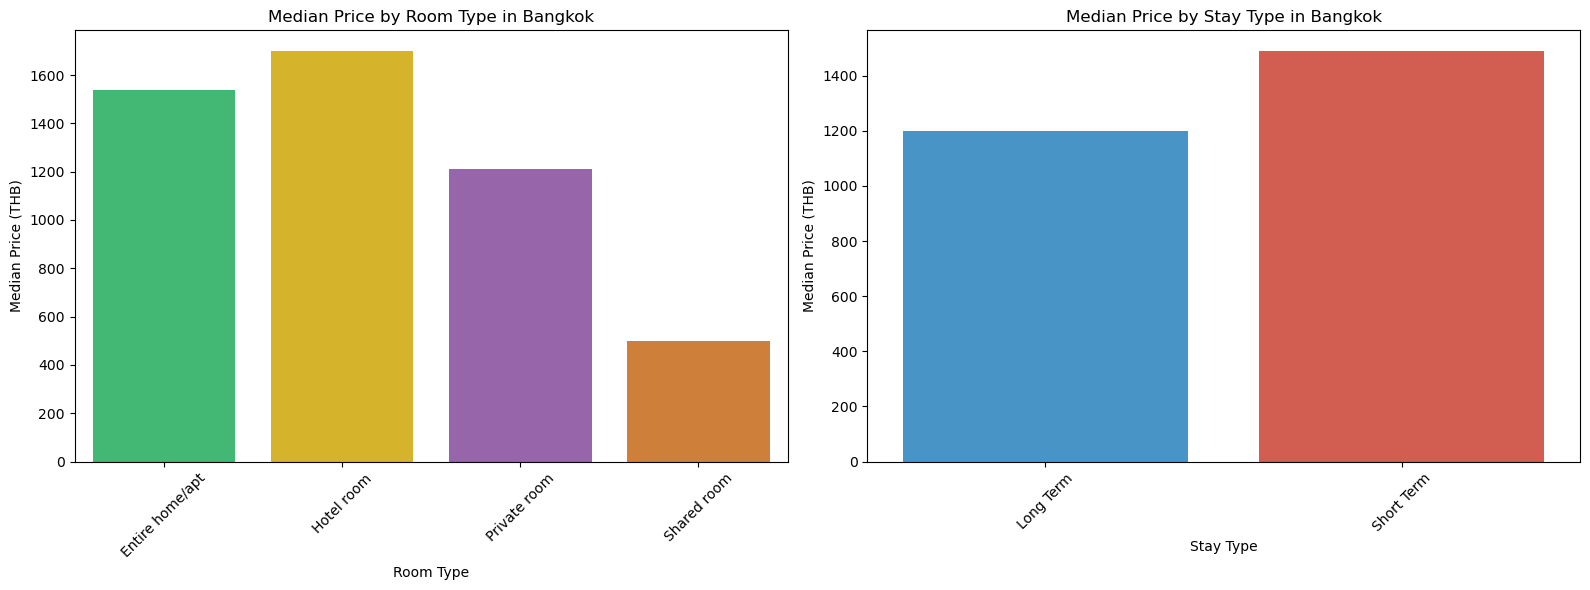

In [7]:
# Calculating median price by room type and by stay type
median_price_by_room_type = df.groupby('room_type')['price'].median()
median_price_by_stay_type = df.groupby('stay_type')['price'].median()

# Visualizing the data
# Setting up a visually appealing color palette
colors_room_type = ["#2ecc71", "#f1c40f", "#9b59b6", "#e67e22"]  # Green, Yellow, Purple, Orange
colors_stay_type = ['#3498db', '#e74c3c']  # Blue, Red

# Creating side by side barplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Room Type vs Median Price
sns.barplot(ax=axes[0], x=median_price_by_room_type.index, y=median_price_by_room_type.values, palette=colors_room_type)
axes[0].set_title('Median Price by Room Type in Bangkok')
axes[0].set_xlabel('Room Type')
axes[0].set_ylabel('Median Price (THB)')
axes[0].tick_params(axis='x', rotation=45)

# Stay Type vs Median Price
sns.barplot(ax=axes[1], x=median_price_by_stay_type.index, y=median_price_by_stay_type.values, palette=colors_stay_type)
axes[1].set_title('Median Price by Stay Type in Bangkok')
axes[1].set_xlabel('Stay Type')
axes[1].set_ylabel('Median Price (THB)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Insight:
1. Room Type vs Price:
- There is a significant difference in median prices among different room types. The median price for "entire home/apt" and "hotel room" is higher than other room types. Room types with higher median prices indicate the opportunity for more flexible pricing, which could reflect increased demand for these types of rooms.
2. Stay Type vs Price:
- There is a difference in median prices between short-term and long-term stays. As expected, prices for short-term stays tend to be higher than long-term stays. We suggest that long-term guests might be looking for more affordable rates, whereas short-term guests are more flexible in pricing.

#### **C. Popularity vs Room Type and Stay Type** ####

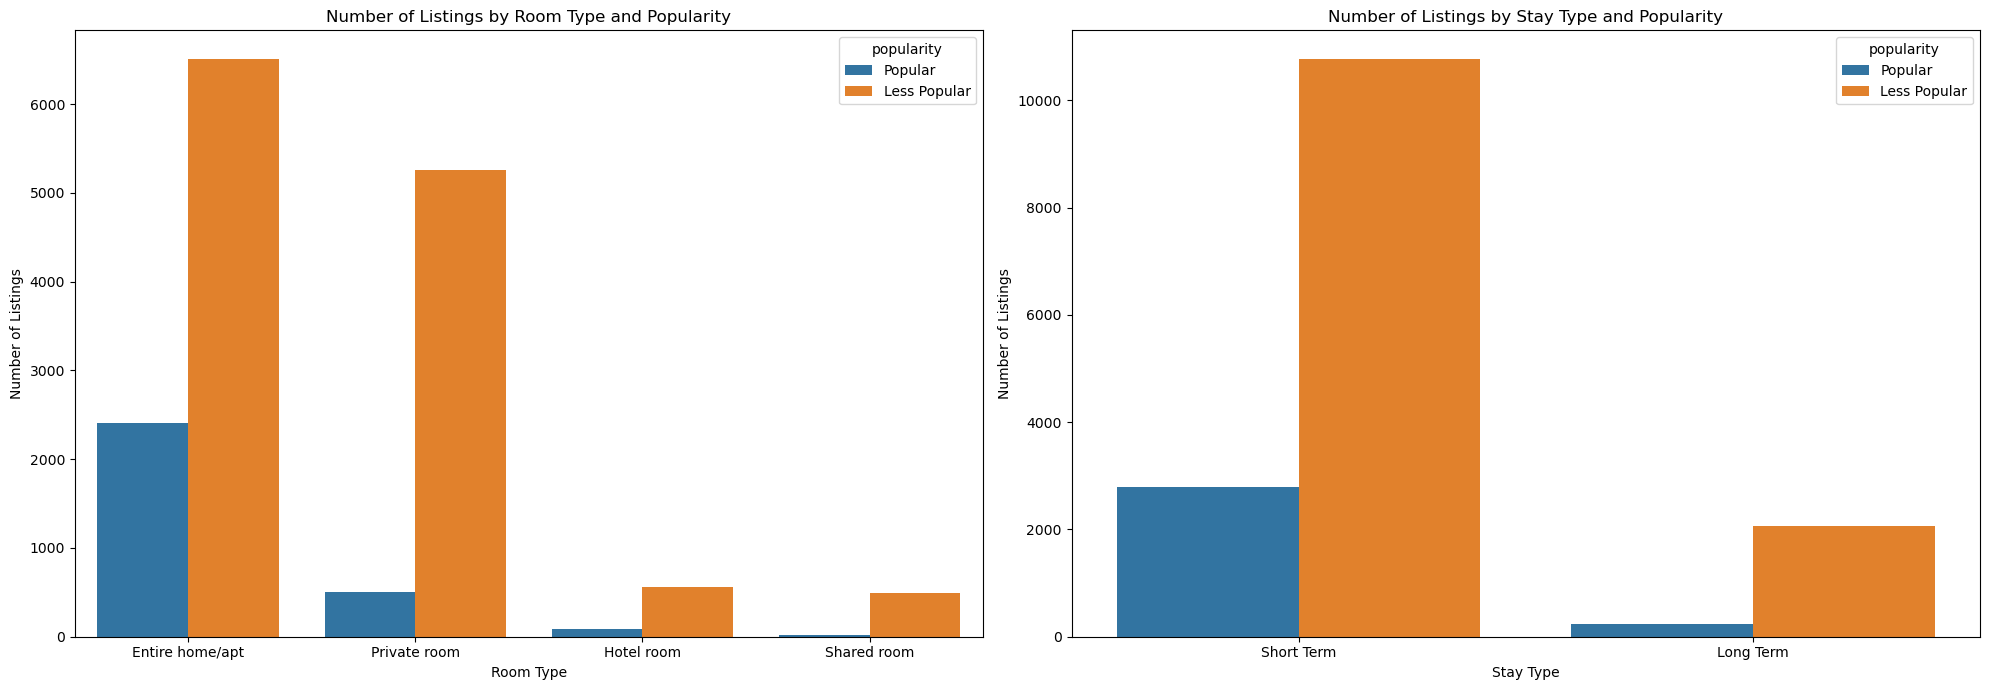

In [8]:
# Initialize the figure
plt.figure(figsize=(20, 7))

# Room Type vs Popularity
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='room_type', hue='popularity')
plt.title('Number of Listings by Room Type and Popularity')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')

# Stay Type vs Popularity
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='stay_type', hue='popularity')
plt.title('Number of Listings by Stay Type and Popularity')
plt.xlabel('Stay Type')
plt.ylabel('Number of Listings')

plt.tight_layout()
plt.show()

Insight:
1. Room_type vs Popularity:
    - There is a significant difference in listing popularity among room types. Listings with high popularity are reflected in "entire home/apt," indicating that this room type tends to have more reviews than others.

2. Stay_type vs Popularity:
    - Short-term listings ("Short Term") tend to be more popular compared to long-term listings ("Long Term"). This suggests that guests more frequently choose short-term accommodations on Airbnb.


#### **D. Most word in the listing name of the popular Airbnb listing in Bangkok** ####

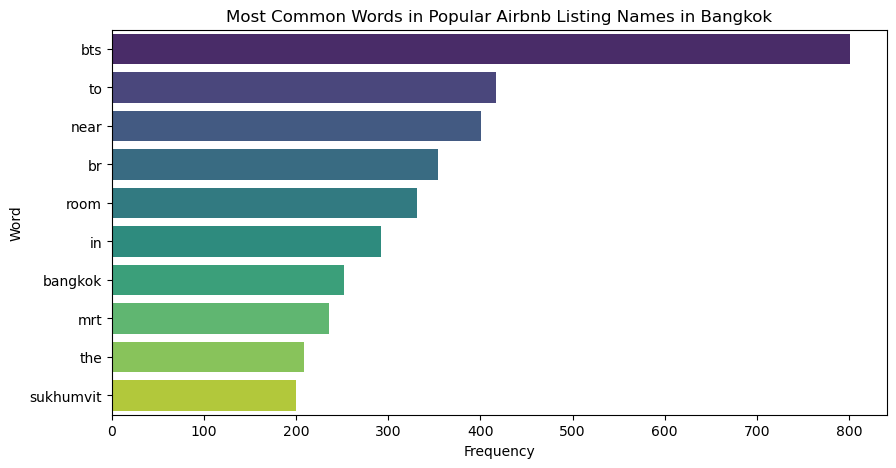

In [9]:
# Define the clean_and_tokenize function
def clean_and_tokenize(text):
    # Convert to lowercase
    text = text.lower()
    # Remove unwanted characters using regular expressions
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize by splitting on whitespace
    tokens = text.split()
    return tokens

# Assuming df is your DataFrame

# Filter the DataFrame for 'Popular' listings
popular_listings = df[df['popularity'] == 'Popular']

# Apply the function and flatten the list of lists
all_words = []
for text in popular_listings['listing_name']:
    all_words.extend(clean_and_tokenize(text))

# Count the frequency of words
word_counts = Counter(all_words)

# 10 most common words
most_common_words = word_counts.most_common(10)

# Creating a DataFrame for visualization
df_most_common_words = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Word', data=df_most_common_words, palette="viridis")
plt.title('Most Common Words in Popular Airbnb Listing Names in Bangkok')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

Insight: 
The words above can be used to increase the popularity of Airbnb listings in Bangkok.

### **2. External Factors** ###



#### **Geoprahic Analytics** ####

##### **A. Top 5 Neighbourhoods by Median Price** #####

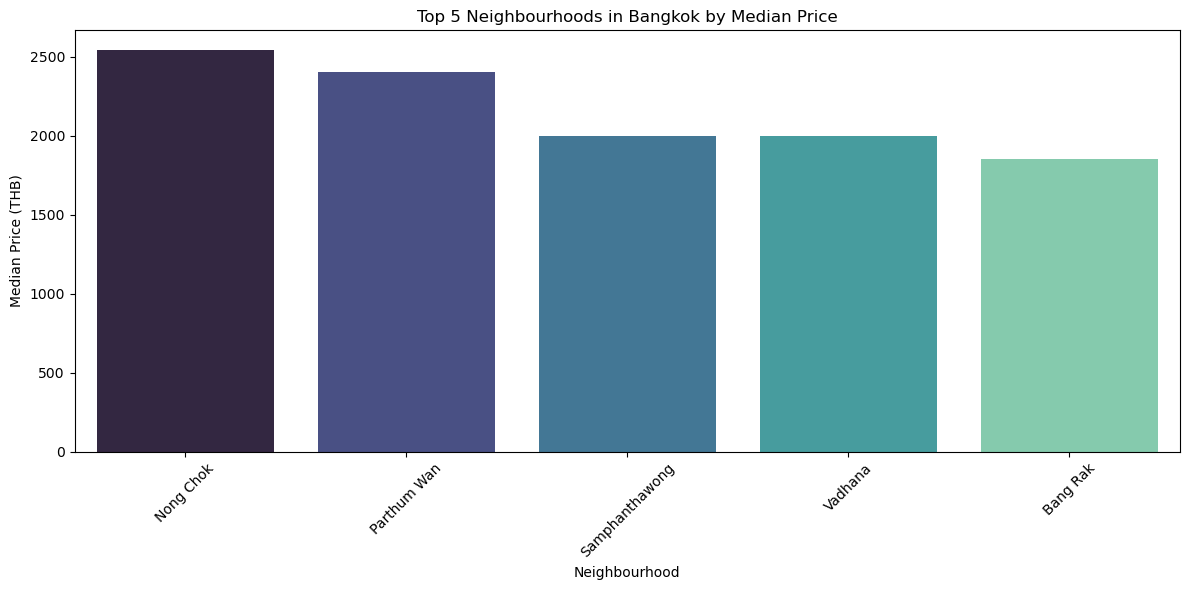

neighbourhood
Nong Chok         2539
Parthum Wan       2400
Samphanthawong    2000
Vadhana           2000
Bang Rak          1850
Name: price, dtype: int64

In [10]:
# Calculating the median price per neighbourhood
median_price_per_neighbourhood = df.groupby('neighbourhood')['price'].median().round(0).astype(int)

# Determining the top 5 neighbourhoods based on median price
top_5_neighbourhoods_by_median_price = median_price_per_neighbourhood.nlargest(5)

# Creating a barplot for the top 5 neighbourhoods by median price
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_neighbourhoods_by_median_price.index, y=top_5_neighbourhoods_by_median_price.values, palette="mako")
plt.title('Top 5 Neighbourhoods in Bangkok by Median Price')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Price (THB)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Displaying the median prices for reference
top_5_neighbourhoods_by_median_price

Insight:
  - Using median prices provides a more precise and easier-to-understand picture of rental fees in various neighborhoods. The visual above illustrates the areas with the highest median prices, which are attractive to specific market segments looking for an exclusive staying experience or higher comfort in Bangkok. It can also be concluded that location influences Airbnb prices.

##### **B. Top 5 Neighbourhoods by Popularity** #####

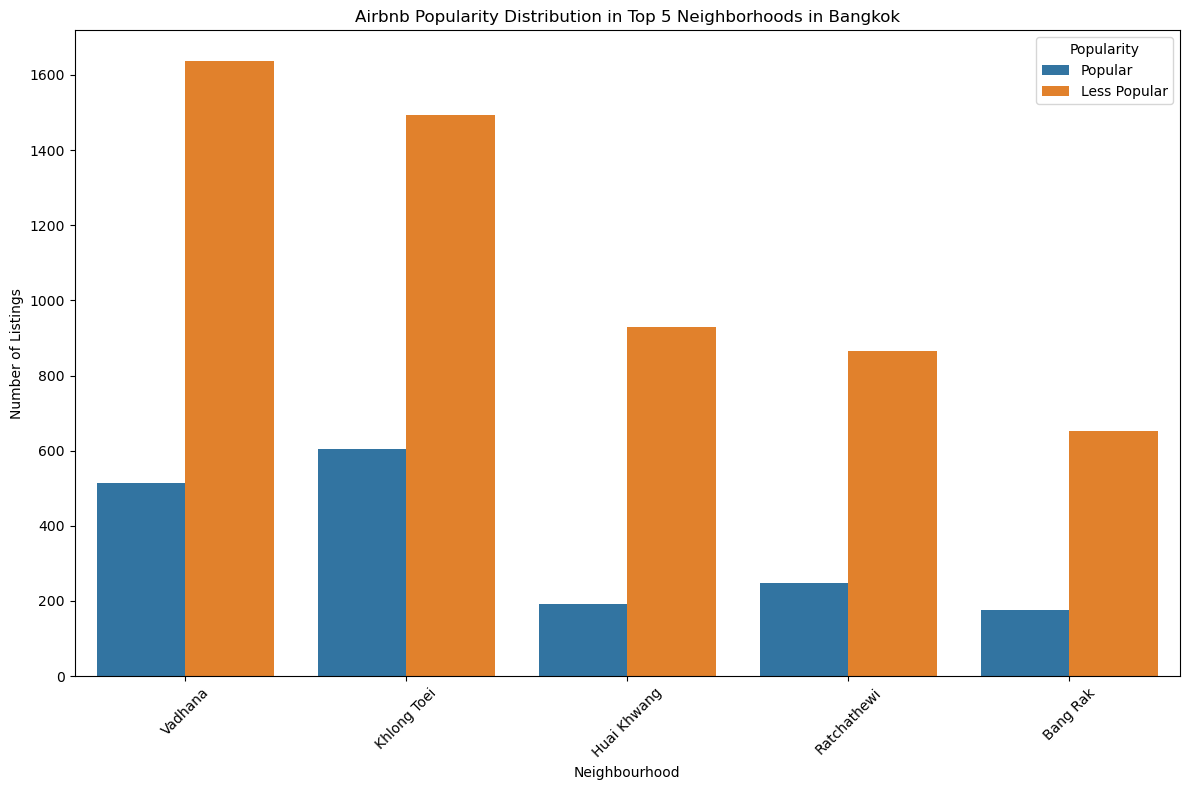

Vadhana        2152
Khlong Toei    2097
Huai Khwang    1123
Ratchathewi    1114
Bang Rak        827
Name: neighbourhood, dtype: int64

In [11]:
# Prepare the data for top 5 neighbourhoods
top_5_neighbourhoods = df['neighbourhood'].value_counts().nlargest(5).index
df_top_5 = df[df['neighbourhood'].isin(top_5_neighbourhoods)]

# Calculating total listings per neighbourhood
total_listings_per_neighbourhood = df_top_5['neighbourhood'].value_counts()

# Sorting the neighbourhoods based on total listings
sorted_neighbourhoods = total_listings_per_neighbourhood.index

# Creating a vertical barplot with sorted neighbourhoods
plt.figure(figsize=(12, 8))
sns.countplot(x='neighbourhood', hue='popularity', data=df_top_5, palette={"Popular": blue_color, "Less Popular": orange_color}, order=sorted_neighbourhoods)
plt.title('Airbnb Popularity Distribution in Top 5 Neighborhoods in Bangkok')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.legend(title='Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display total listings per neighbourhood for reference
total_listings_per_neighbourhood

Insight:
- The Vandhana and Khlong Toei districts own the most popular listings compared to the other 48 districts.
- The visualization above depicts the differences in the popularity levels of each area. It can also be concluded that location affects the popularity of Airbnb listings.


##### **C. 5 Top and Bottom Neighbourhoods by Room Type** #####

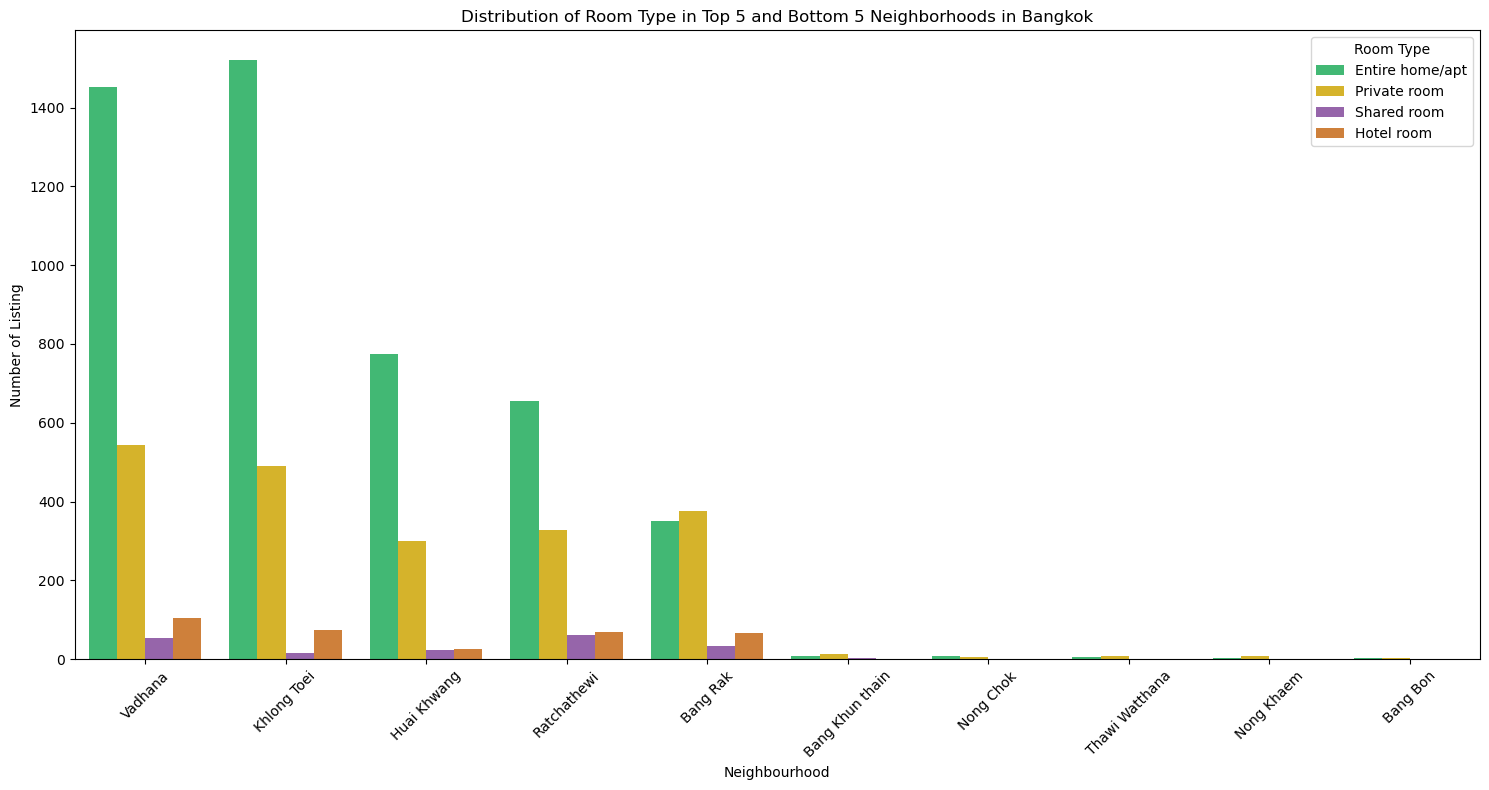

In [12]:
# Finding top 5 and bottom 5 neighbourhoods based on number of listings
top_neighbourhoods = df['neighbourhood'].value_counts().nlargest(5).index
bottom_neighbourhoods = df['neighbourhood'].value_counts().nsmallest(5).index

# Filter data for top 5 and bottom 5 neighbourhoods
top_bottom_neighbourhoods = df[df['neighbourhood'].isin(top_neighbourhoods.union(bottom_neighbourhoods))]

# Setting up a visually appealing color palette for room types
colors_room_type = ["#2ecc71", "#f1c40f", "#9b59b6", "#e67e22"]  # Green, Yellow, Purple, Orange

# Visualizing room_type for top 5 and bottom 5 neighbourhoods (Vertical orientation)
plt.figure(figsize=(15, 8))
sns.countplot(x='neighbourhood', hue='room_type', data=top_bottom_neighbourhoods, palette=colors_room_type, order=top_bottom_neighbourhoods['neighbourhood'].value_counts().index)
plt.title('Distribution of Room Type in Top 5 and Bottom 5 Neighborhoods in Bangkok')
plt.ylabel('Number of Listing')
plt.xlabel('Neighbourhood')
plt.legend(title='Room Type', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight:

- Active vs Passive Neighborhoods:
Neighborhoods with the highest number of listings show a strong tendency to offer "Entire home/apt," indicating the popularity of this type in larger markets. Conversely, the distribution among different room types is more balanced in neighborhoods with less activity.

- Potential for Diversification: Neighborhoods with lower Airbnb activity may have potential for diversifying offerings, given the lack of dominance by a particular room type.

##### **D. 5 Top and Bottom Neighbourhoods by Stay Type** #####

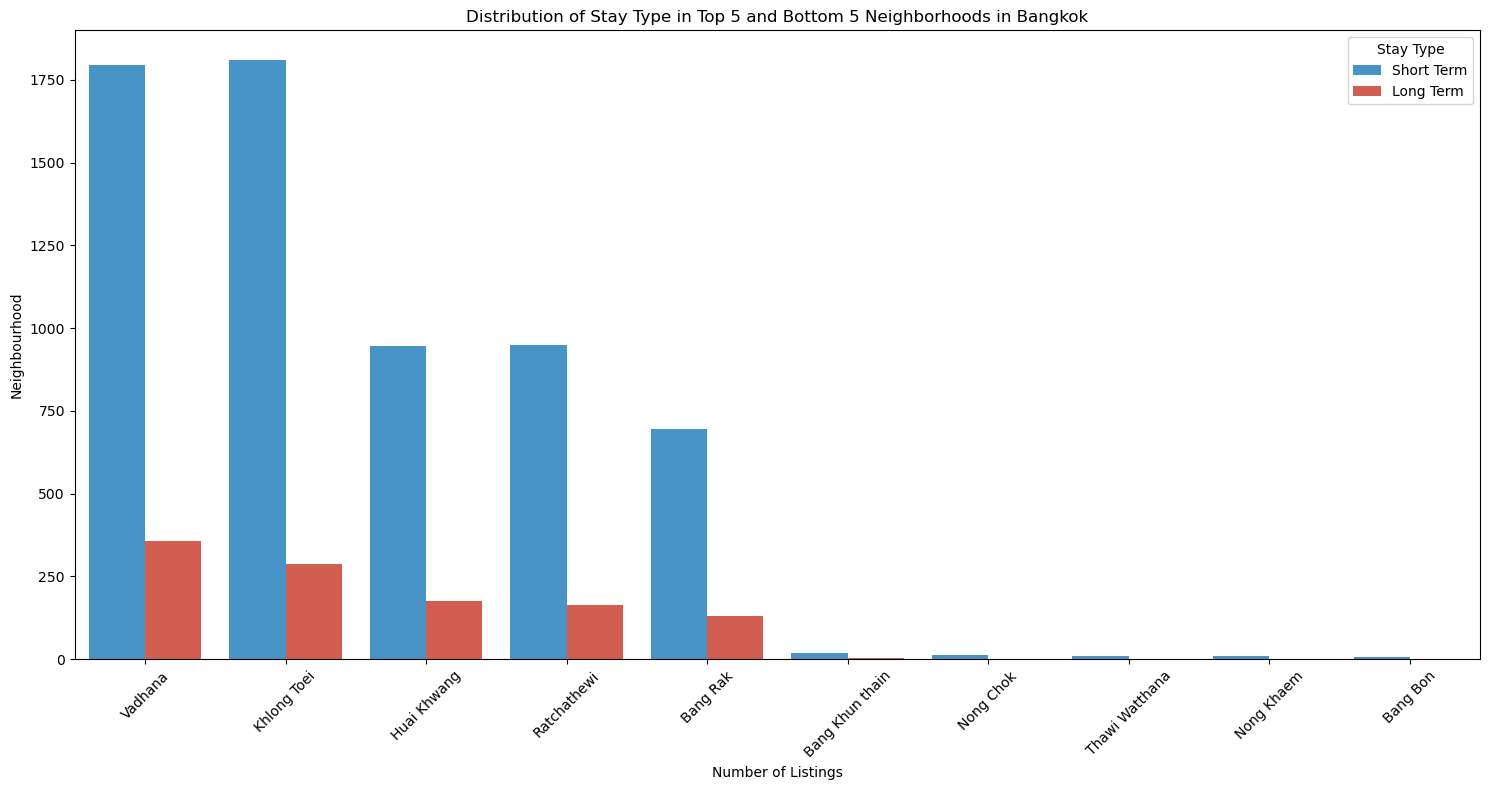

In [13]:
# Finding top 5 and bottom 5 neighbourhoods based on number of listings
top_neighbourhoods = df['neighbourhood'].value_counts().nlargest(5).index
bottom_neighbourhoods = df['neighbourhood'].value_counts().nsmallest(5).index

# Filtering data for top 5 and bottom 5 neighbourhoods
top_bottom_neighbourhoods = df[df['neighbourhood'].isin(top_neighbourhoods.union(bottom_neighbourhoods))]

# Visualizing stay_type for top 5 and bottom 5 neighbourhoods with the specified color palette
plt.figure(figsize=(15, 8))
sns.countplot(x='neighbourhood', hue='stay_type', data=top_bottom_neighbourhoods, palette=colors_stay_type, 
              order=top_bottom_neighbourhoods['neighbourhood'].value_counts().index)
plt.title('Distribution of Stay Type in Top 5 and Bottom 5 Neighborhoods in Bangkok')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.legend(title='Stay Type', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Insight:
1. The dominance of "Short-Term" in Active Neighborhoods: In neighborhoods with the highest number of listings, there is a clear dominance of "Short-Term" stay types, indicating that this is a more popular format for travelers in these areas.
2. Balance in Less Active Neighborhoods: In neighborhoods with fewer listings, there is a more balanced distribution between "Short Term" and "Long Term" stays, suggesting diverse accommodation needs in these areas.

## **Conclusions and Recommendation** ##

### **Conclusions** ###

Key Findings:

1. Based on the analysis conducted from both internal and external perspectives, it can be concluded that popularity and pricing are significantly influenced by room type, stay type, and neighborhood.

    - Pricing and popularity of listings:
    There is a wide range of prices, and popular listings tend to have higher prices.

    - Key factors for popularity:
    Airbnb listings for short-term stays and "Entire home/apt" room types are more likely to be popular.

    - Neighborhood:
    Some districts, like Vandhana, Khlong Toei, and Huai Khwang, have higher median prices and popularity.

2. Location is a crucial factor in determining price and popularity; in other words, price and popularity vary based on location/district. Specific locations in Bangkok are more appealing to the market due to various factors they possess, affecting listing performance. Additionally, room type and stay type also influence listing performance.

### **Recommendation** ###

1. Pricing Strategy:
    - Hosts are advised to consider neighborhood, room type, and stay type when setting prices. Prices should reflect the demand and value offered by the listing. Pricing for popular listings can be more flexible due to perceived premium features or better locations. Regarding stay types, pricing can be higher for short-term stays as short-term renters tend to be more flexible regarding price.

2. Promotion and Marketing:
    - Focus on short-term stays and suitable room types. Given the higher popularity trend in these categories, hosts recommend offering more "Entire home/apt" options and focusing on short-term accommodations. This approach can be applied in areas such as Vandhana and Khlong Toei.

    - For less popular locations, increasing promotion and diversifying services is advised. This can balance the demand distribution and maximize untapped market potential. This approach can be applied in Bang Bon, Nong Khaem, and others.

    - Guest characteristics based on stay_type tend to prefer short-term stays. Hosts could consider offering special promotions for holidays, such as weekend discounts.

3. Management and Ownership of Listings:
   - Hosts/owners are advised to continuously improve service quality and be more aware of the importance of reviews. Therefore, listing management should actively ensure they consistently receive excellent and positive reviews.
   - Hosts can use listing descriptions with keywords like "BTS", "to", "near", "BR", "room", etc. These words are critical indicators of popular listings.

4. Data Utilization for Prediction and Adaptation:
    - Airbnb should continue its data collection related to its business and conduct ongoing data analysis to understand market trend shifts and dynamically adjust strategies.


---------------------------------------------------